# Exploration done on the EPFL recommender system

# Data Retrieval

In [1]:
import configparser
import matplotlib.pyplot as plt
import mysql.connector as sql
import numpy as np
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

# Read the confidential token.
credentials = configparser.ConfigParser()
credentials.read('credentials.ini')
db_connection = sql.connect(host=credentials.get('mysql', 'url'),
                            database='semester_project_romain',
                            user=credentials.get('mysql', 'username'),
                            password=credentials.get('mysql', 'password'))

In [2]:
# Found courses that should be removed:
courses_to_remove = [
    "Admission année sup.",
    "Projet de master en systèmes de communication",
    "SHS : Introduction au projet",
    "Cycle master",
    "Projet de Master",
    "Groupe Core courses & options",
    "Bloc Projets et SHS",
    "Groupe 2 : Options",
    "Master SC",
    "Mineur",
    "Groupe 1",
    "Projet en systèmes de communication II",
    "Projet en informatique II",
    "Projet de master en informatique",
    "Cours réservés spécifiquement aux étudiants s'inscrivant pour le mineur Area and Cultural Studies",
    "SHS : Projet",
    "Optional project in communication systems",
    "Optional project in computer science",
    "Mineur : Neurosciences computationnelles",
    "Stage d'ingénieur crédité avec le PDM (master en Systèmes de communication)",
    "Stage d'ingénieur crédité avec le PDM (master en Informatique)",
    "Cours UNIL - Faculté des hautes études commerciales HEC I (printemps)",
]

domains_to_remove = [
    "Humanities and social sciences",
    "Programme Sciences humaines et sociales",
]

In [3]:
# PlanType = "PLAN_EXAMINE" ?????
all_info = """
            select distinct 
                PersonID, 
                PedagogicalCode, 
                StudyDomain, 
                UnitName, 
                SubjectName, 
                Course_Enrolments.SubjectID,
                SectionName, 
                CourseCode,
                YearName
            from 
                Course_Enrolments
                inner join 
                Course_Codes 
                    on Course_Codes.planid = course_enrolments.planid 
                    and Course_Codes.subjectid = course_enrolments.subjectid
            where 
                LevelName = "Master"
                and IsStudent = 1
                and IsEnrolled = 1
                and (YearName = "2010-2011"
                or YearName = "2011-2012"
                or YearName = "2012-2013"
                or YearName = "2013-2014"
                or YearName = "2014-2015"
                or YearName = "2015-2016")
                
            """
#all_df = pd.read_sql(all_info, con=db_connection)
#all_df = all_df[~all_df.SubjectName.isin(courses_to_remove)]
# Removing the SHS courses
#all_df = all_df[~(all_df.StudyDomain.isin(domains_to_remove))]
#print(all_df.UnitName.unique())
#all_df

In [4]:
# PlanType = "PLAN_EXAMINE" ?????
years = """and (YearName = "2010-2011"
                or YearName = "2011-2012"
                or YearName = "2012-2013"
                or YearName = "2013-2014"
                or YearName = "2014-2015"
                or YearName = "2015-2016")"""

years_test = """and (YearName = "2006-2007"
                or YearName = "2007-2008"
                or YearName = "2008-2009"
                or YearName = "2009-2010"
                or YearName = "2010-2011"
                or YearName = "2011-2012"
                or YearName = "2012-2013"
                or YearName = "2013-2014"
                or YearName = "2014-2015"
                or YearName = "2015-2016")"""
all_info = """
            select distinct 
                PersonID, 
                PedagogicalCode, 
                StudyDomain, 
                UnitName, 
                UnitID, 
                UnitCode,
                SubjectName, 
                Course_Enrolments.SubjectID,
                SectionName, 
                CourseCode,
                YearName
            from 
                Course_Enrolments
                inner join 
                Course_Codes 
                    on Course_Codes.planid = course_enrolments.planid 
                    and Course_Codes.subjectid = course_enrolments.subjectid
            where 
                (UnitName like "%nform%" 
                or UnitName like "%omm%")
                and LevelName = "Master"
                {}
            """.format('')

all_df = pd.read_sql(all_info, con=db_connection)
all_df = all_df[~all_df.SubjectName.isin(courses_to_remove)]
# Removing the SHS courses
all_df = all_df[~(all_df.StudyDomain.isin(domains_to_remove))]
# Mapping of subject ids to subject names
subject_mapping = all_df[['SubjectID', 'SubjectName']].drop_duplicates()
all_df

,PersonID,PedagogicalCode,StudyDomain,UnitName,UnitID,UnitCode,SubjectName,SubjectID,SectionName,CourseCode,YearName
0,49334748,BA4,Architecture,Systèmes de communication - master,950840,SC_EPFL,Economie du logement,898353143,Architecture,AR-284,2012-2013
1,57349668,BA4,Architecture,Systèmes de communication - master,950840,SC_EPFL,Economie du logement,898353143,Architecture,AR-284,2012-2013
2,29123807,MA1,Architecture,Informatique,249847,IN,Théorie de l'espace,227270058,Architecture,AR-461,2012-2013
3,2384545,MA3,Life sciences,Systèmes de communication - master,950840,SC_EPFL,Cellular biology and biochemistry for engineers,71603711,Systèmes de communication - master,BIO-105,2008-2009
4,105055035,MA3,Life sciences,Systèmes de communication - master,950840,SC_EPFL,Cellular biology and biochemistry for engineers,71603711,Systèmes de communication - master,BIO-105,2008-2009
5,2392890,MA3,Life sciences,Systèmes de communication - master,950840,SC_EPFL,Cellular biology and biochemistry for engineers,71603711,Systèmes de communication - master,BIO-105,2008-2009
6,2502759,MA3,Life sciences,Systèmes de communication - master,950840,SC_EPFL,Cellular biology and biochemistry for engineers,71603711,Systèmes de communication - master,BIO-105,2008-2009
7,109679682,MA3,Life sciences,Informatique,249847,IN,Cellular biology and biochemistry for engineers,71603711,Informatique,BIO-105,2008-2009
8,2416702,MA3,Life sciences,Informatique,249847,IN,Cellular biology and biochemistry for engineers,71603711,Informatique,BIO-105,2008-2009
9,40908413,MA3,Life sciences,Informatique,249847,IN,Cellular biology and biochemistry for engineers,71603711,Informatique,BIO-105,2008-2009


In [5]:
current_courses = """
            select distinct 
                PedagogicalCode, 
                SubjectName, 
                SubjectID,
                StudyDomain,
                YearName
            from 
                Course_Enrolments 
            where 
                UnitName like "%ommunication%" 
                and 
                LevelName = "Master"
                and left(PedagogicalCode, 2) = "MA"
                and YearName = "2015-2016"
            """
#current_courses_df = pd.read_sql(current_courses, con=db_connection)
# These are the current courses (latest data) given in syscom @EPFL
#current_courses_df = current_courses_df[~current_courses_df.SubjectName.isin(courses_to_remove)]
#current_courses_df = current_courses_df[~current_courses_df.StudyDomain.isin(domains_to_remove)]
#current_courses_df

## Creating the binary matrix

In [6]:
courses_matrix = all_df[['PersonID', 'SubjectName']]
courses_matrix = courses_matrix.drop_duplicates()
courses_matrix = courses_matrix.set_index(['PersonID', 'SubjectName'])

def series_to_integers(series):
    "Converts a whole series to integers"
    return pd.to_numeric(series, downcast='integer')

# If the course was taken, set it to 1
courses_matrix['joined'] = 1
courses_matrix = courses_matrix.reset_index().pivot(index='PersonID', columns='SubjectName', values='joined')
courses_matrix = courses_matrix.fillna(0)
courses_matrix = courses_matrix.apply(series_to_integers)

# Removing all students that took less than five courses
MIN_COURSES_BY_STUDENT = 10
courses_matrix =courses_matrix[np.sum(courses_matrix == 1, axis=1) > MIN_COURSES_BY_STUDENT]
courses_matrix

SubjectName,Accounting for finance,Advanced algorithms,Advanced analysis I,Advanced analysis II,Advanced compiler construction,Advanced computer architecture,Advanced computer graphics,Advanced computer networks and distributed systems,Advanced cryptography,Advanced databases,...,Traitement des signaux biomédicaux,Traitement quantique de l'information,Traitement quantique de l'information I,Traitement quantique de l'information II,Unsupervised and reinforcement learning in neural networks,VLSI design I,VLSI design I + EDA TP,VLSI design II,Virtual reality,Wireless receivers: algorithms and architectures
PersonID,,,,,,,,,,,,,,,,,,,,,
2383414,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2384545,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2392890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2394223,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2394686,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
2412404,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2414145,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2416092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2416702,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Co-enrolment matrix
## Most taken courses
We need to find a way to get a cleaner dataset of courses, a lot of them are not usefull or outdated and should not be recommended.

In [7]:
# Taking a look at the most taken courses
registrations_df = all_df.set_index(['SubjectName', 'YearName'])
all_df_registrations = registrations_df.groupby(['SubjectName', 'YearName']).size()

registrations_df['Registration'] = all_df_registrations
registrations_df = registrations_df.reset_index()
# Pick only courses that have a study domain (removes bullshit)
# such as Projects and groups, minors etc
registrations_df = registrations_df[~registrations_df.StudyDomain.isnull()]
# Remove the SHS courses
registrations_df = registrations_df[~(registrations_df.StudyDomain == "Programme Sciences humaines et sociales")]
# Removes non important information
registrations_df = registrations_df.drop([
    'PersonID', "StudyDomain", "SectionName", "PedagogicalCode",
    "CourseCode"], axis=1)
registrations_df = registrations_df.drop_duplicates()
registrations_df = registrations_df.set_index(['SubjectName', 'YearName']).sort_index()
registrations = registrations_df.sort_values(ascending=False, by='Registration')

# Latest data registrations
registrations.xs('2015-2016', level='YearName')

,UnitName,UnitID,UnitCode,SubjectID,Registration
SubjectName,,,,,
Pattern classification and machine learning,Systèmes de communication - master,950840,SC_EPFL,1771468,192
Pattern classification and machine learning,Informatique,249847,IN,1771468,192
Cryptography and security,Systèmes de communication - master,950840,SC_EPFL,1770973,170
Cryptography and security,Informatique,249847,IN,1770973,170
Distributed algorithms,Systèmes de communication - master,950840,SC_EPFL,1773287,167
Distributed algorithms,Informatique,249847,IN,1773287,167
TCP/IP networking,Informatique,249847,IN,1771764,167
TCP/IP networking,Systèmes de communication - master,950840,SC_EPFL,1771764,167
Intelligent agents,Informatique,249847,IN,1771183,130


## Enrolments

In [8]:
co_enrolments = pd.DataFrame(data=0, columns=courses_matrix.columns, index=courses_matrix.columns)
for row in courses_matrix.iterrows():
    taken_courses = row[1][row[1] == 1].index.tolist()
    for i,course in enumerate(taken_courses):
        co_enrolments.loc[course, taken_courses[i+1:]] += 1
    

# Copy the upper triangle matrix to lower triangle one
co_enrolments = co_enrolments + co_enrolments.T

# Transforming to probabilities and removing the rows summing to nan
co_enrolments = co_enrolments / co_enrolments.sum(axis=0)

def get_coenrolment(course, other_enrolments):
    return co_enrolments.loc[course, other_enrolments].mean()

def training_weight_coenrolments(user_index):
    courses_taken = courses_matrix.iloc[user_index][courses_matrix.iloc[user_index] == 1].index.tolist()
    return [ get_coenrolment(c, courses_taken) for c in courses_matrix.columns.tolist() ]

## Grades correlations inbetween courses

In [9]:
def course_id_mapper(sub_id):
    mapped = subject_mapping[subject_mapping.SubjectID == sub_id].SubjectName
    return mapped.values[0] if not mapped.empty else np.nan

# If one of the correlations is non-existent, return the other
def correlation_series_mean(f_corr, s_corr):
    if f_corr == -5 and s_corr == -5: raise Exception("both correlations non-existent")
    if f_corr == -5 or s_corr == -5: return max(f_corr, s_corr)
    return np.mean([f_corr, s_corr])
    
# Retrieve courses correlations
grade_corr = pd.read_csv('data/correlation-subject-pair.csv')
grade_corr = grade_corr[['sub1', 'sub2', "cor1", "cor2"]]
grade_corr['cor_mean'] = grade_corr[['cor1', 'cor2']].apply(lambda x: correlation_series_mean(x[0],x[1]), axis=1)
grade_corr = grade_corr[['sub1', 'sub2', 'cor_mean']]

# Use SubjectName instead of SubjectID
grade_corr['sub1_name'] = grade_corr.sub1.map(course_id_mapper)
grade_corr['sub2_name'] = grade_corr.sub2.map(course_id_mapper)
grade_corr = grade_corr.dropna()[['sub1_name', 'sub2_name', 'cor_mean']]

# In case there are no correlations, we set to the mean of all of them
mean_correlations = grade_corr.mean()

# Let's make it a matrix
grade_corr_matrix = grade_corr.set_index(["sub1_name", "sub2_name"]).unstack(level=0).fillna(mean_correlations)
# normalize correlations by adding 1 and dividing by the max
grade_corr_matrix = (grade_corr_matrix + 1)/2

# Set not found courses correlations to the mean of all correlations
no_corr_courses = [ c for c in courses_matrix.columns.tolist() if c not in grade_corr_matrix.index.tolist() ]
missing_correlations = pd.DataFrame(np.full(fill_value=mean_correlations, 
                                            shape=(grade_corr_matrix.shape[0], len(no_corr_courses))), 
                                    columns=no_corr_courses, 
                                    index=grade_corr_matrix.index.tolist())
grade_corr_matrix.columns = grade_corr_matrix.columns.droplevel()
grade_corr_matrix = pd.concat([grade_corr_matrix, missing_correlations], axis=1)

# Let's transform it into probabilistic
grade_corr_matrix = grade_corr_matrix / grade_corr_matrix.sum(axis=0)

def get_grades_corr(course, other_enrolments):
    if course not in grade_corr_matrix.index.tolist():
        return 1/grade_corr_matrix.shape[1]
    return grade_corr_matrix.loc[course, other_enrolments].mean()

def training_weight_grade_corr(user_index):
    courses_taken = courses_matrix.iloc[user_index][courses_matrix.iloc[user_index] == 1].index.tolist()
    return [ get_grades_corr(c, courses_taken) for c in courses_matrix.columns.tolist() ]

# The final dataframe of courses correlations
grade_corr_matrix

,Advanced algorithms,Advanced compiler construction,Advanced computer architecture,Advanced computer graphics,Advanced databases,Advanced digital communications,Algorithms,Algèbre,Analog circuits design I,Analyse I,...,Théorie de Galois,Théorie de l'espace,Topics in theoretical computer science,Traitement quantique de l'information,Traitement quantique de l'information I,Traitement quantique de l'information II,VLSI design I,VLSI design I + EDA TP,VLSI design II,Wireless receivers: algorithms and architectures
sub2_name,,,,,,,,,,,,,,,,,,,,,
Advanced algorithms,0.005744,0.005726,0.005744,0.006376,0.005893,0.005718,0.005742,0.005777,0.005758,0.005733,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747
Advanced computer architecture,0.005744,0.005726,0.005744,0.005744,0.005737,0.005718,0.005742,0.005777,0.005758,0.005733,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747
Advanced cryptography,0.005744,0.005726,0.005744,0.005744,0.005737,0.005718,0.005742,0.005777,0.005758,0.005733,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747
Advanced digital communications,0.005744,0.005726,0.005744,0.005744,0.005737,0.005718,0.005742,0.005777,0.005758,0.005733,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747
Advanced theoretical computer science,0.005744,0.005726,0.005744,0.005744,0.005737,0.005718,0.005742,0.005777,0.005758,0.005733,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747
Algebra,0.005744,0.005726,0.005744,0.005744,0.005737,0.005718,0.005742,0.005777,0.005758,0.005733,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747
Algorithms,0.005744,0.005726,0.005744,0.005744,0.005737,0.005718,0.005742,0.005777,0.005758,0.005733,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747
Algèbre,0.005744,0.005726,0.005744,0.005744,0.005737,0.005718,0.005742,0.005777,0.005758,0.005733,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747
Analyse I,0.005744,0.005726,0.005744,0.005744,0.005737,0.005718,0.005742,0.005777,0.005758,0.005733,...,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747,0.005747


### Splitting test/train

In [10]:
def split_data(data):
    testing_set = data.applymap(lambda x: 0)

    taken_courses_flat = data.stack().to_frame()
    taken_courses_flat = taken_courses_flat[taken_courses_flat[0] == 1]

    for student in taken_courses_flat.index.get_level_values('PersonID').unique():
        courses = taken_courses_flat.loc[student]
        for course in courses.sample(frac=0.2, replace=False).index:
            testing_set.loc[student, course] = 1
    training_set = data - testing_set

    return training_set, testing_set

training_set, testing_set = split_data(courses_matrix)

# Numpify the data
train_np = training_set.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()
test_np = testing_set.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()

# the indices of each user
users = np.array(np.arange(courses_matrix.shape[0])[np.newaxis].T, dtype=np.int32)

### Metrics

In [11]:
# Precision is the percentage of recommended items that are "good ones"
# Hence, the matched prediction divided by N of Top-N
def precision(y_true, y_pred):
    """
    Takes predictions as an np array of indices,
    true ratings as a numpy array,
    returns precision
    """
    precisions = []
    for i,user in enumerate(y_pred):
        nb_right_pred = sum(y_true[i, user] == 1)
        precisions.append(nb_right_pred / y_pred.shape[1])
    return np.mean(precisions)
    
#Recall is the percentage of good ones that are recommended.
def recall(y_true, y_pred):
    """
    Takes predictions as an np array of indices,
    true ratings as a numpy array,
    returns recall
    """
    recall = []
    for i,user in enumerate(y_pred):
        nb_right_pred = sum(y_true[i, user] == 1)
        recall.append(nb_right_pred / y_true[i].sum())
    return np.mean(recall)
    
def f1_score(y_true, y_pred):
    """
    Takes predictions as an np array of indices,
    true ratings as a numpy array,
    returns f1 score
    """
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    f1 = 2 * (prec * rec) / (prec + rec)
    return f1

def mean_average_precision(y_true, y_pred):
    """
    Takes predictions as an np array of indices,
    true ratings as a numpy array,
    returns the mean average precision
    """
    N = y_pred.shape[1]
    average_prec = []
    for i, user in enumerate(y_pred):
        summed_prec = 0
        for k in np.arange(N):
            prec_k = sum(y_true[i, user] == 1) / N
            rel_k = y_true[i, user[-1]]
            summed_prec += (prec_k * rel_k)
        average_prec.append(summed_prec / min(N, y_true[i].sum()))
    
    return np.mean(average_prec)

#### Collaborative filtering with Collaborative Denoising Auto-Encoders

In [12]:
from keras.layers import Input, Dense, Embedding, Flatten, Dropout, Activation
from keras.layers.merge import Add
from keras.models import Model
from keras.regularizers import l2

def create(I, U, K, hidden_activation, output_activation, q=0.5, l=0.01):
    '''
    create model
    Reference:
      Yao Wu, Christopher DuBois, Alice X. Zheng, Martin Ester.
        Collaborative Denoising Auto-Encoders for Top-N Recommender Systems.
          The 9th ACM International Conference on Web Search and Data Mining (WSDM'16), p153--162, 2016.

    :param I: number of items
    :param U: number of users
    :param K: number of units in hidden layer
    :param hidden_activation: activation function of hidden layer
    :param output_activation: activation function of output layer
    :param q: drop probability
    :param l: regularization parameter of L2 regularization
    :return: CDAE
    :rtype: keras.models.Model
    '''
    x_item = Input((I,), name='x_item')
    h_item = Dropout(q)(x_item)
    h_item = Dense(K, kernel_regularizer=l2(l), bias_regularizer=l2(l))(h_item)

    # dtype should be int to connect to Embedding layer
    x_user = Input((1,), dtype='int32', name='x_user')
    h_user = Embedding(input_dim=U, output_dim=K, input_length=1, embeddings_regularizer=l2(l))(x_user)
    h_user = Flatten()(h_user)

#    h = merge([h_item, h_user], mode='sum')
    h = Add()([h_item, h_user])
    if hidden_activation:
        h = Activation(hidden_activation)(h)
    y = Dense(I, activation=output_activation)(h)

    return Model(inputs=[x_item, x_user], outputs=y)

def success_rate(true, pred):
    """
    The success rate is defined as the percentage of chances that we pick
    one of the recommendations.
    """
    cnt = 0
    for i in range(pred.shape[0]):
        t = np.where(true[i] == 1) # true set
        ary = np.intersect1d(pred[i], t)
        if ary.size > 0:
            cnt += 1
    return cnt * 100 / pred.shape[0]

Using TensorFlow backend.


In [13]:
#for k_test in np.arange(2, 30, 5):
q_test = 0.998
    #q_test = 0.99
#for q_test in np.arange(0.9975, 0.9985, 0.0001):
    #k_test = 18
k_test = 27

# model
# Q was 0.50, now 0.998 ?
model = create(I=train_np.shape[1], U=len(users)+1, K=k_test,
                    hidden_activation='relu', output_activation='sigmoid', q=q_test, l=0.01)
model.compile(loss='mean_absolute_error', optimizer='adam') 
#model.compile(loss='binary_crossentropy', optimizer='adam') 

#    model.summary()

# train
history = model.fit(x=[train_np, users], y=train_np,
                    batch_size=128, epochs=2000, verbose=0,
                    #validation_data=[[test_np, users],
                    #test_np])
                    validation_split=0.20)

pred = model.predict(x=[test_np, users])
pred = pred * (train_np == 0) # remove watched items from predictions

In [14]:
def print_stats_prediction(pred):
    sorted_predictions = np.argsort(pred)

    mean_aps = []
    precisions, recalls, f1s = [], [], []

    # Take the N best recommendations
    N = 20
    print("For k =", k_test, ":")
    print("For q =", q_test, ":")
    print("\tdifference of success rates at 10 - 1:", success_rate(test_np, sorted_predictions[:,-10:]) - success_rate(test_np, sorted_predictions[:,-1:]))
    for n in range(1, N + 1):
        prediction_at_n = sorted_predictions[:, -n:]
        mean_ap = mean_average_precision(test_np, prediction_at_n)
        mean_aps.append(mean_ap)
        prec = precision(test_np, prediction_at_n)
        precisions.append(prec)
        rec = recall(test_np, prediction_at_n)
        recalls.append(rec)
        f1 = f1_score(test_np, prediction_at_n)
        f1s.append(f1)
        sr = success_rate(test_np, prediction_at_n)
        print("\n\tSuccess Rate at {:d}: {:f}".format(n, sr))
        print("\tMAP at {}: {}".format(n, mean_ap))
        print("\tPrecision at {}: {}".format(n, prec))
        print("\tRecall at {}: {}".format(n, rec))
        print("\tF1 score at {}: {}".format(n, f1))
        
    # Plotting the MAP at k
    map_df = pd.DataFrame(mean_aps)
    map_df.index.name = 'K'
    map_df.rename(columns={0:'Mean average precision'}, inplace=True)
    map_df = map_df.reset_index()
    map_df['K'] = map_df['K'] + 1

    col_pal = sns.cubehelix_palette(N, reverse=True)
    sns.barplot(x="K", y="Mean average precision", data=map_df, palette=col_pal)
    plt.title("Mean average precision at k for top-k courses recommendations")
    plt.show()


    prec_rec_df = pd.DataFrame(data={"Precision":precisions, "Recall":recalls})
    plt.plot(recalls, precisions, color='b', alpha=0.2)
    plt.fill_between(recalls, precisions, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.show()

## Baseline prediction

For k = 27 :
For q = 0.998 :
	difference of success rates at 10 - 1: 44.832041343669246

	Success Rate at 1: 34.496124
	MAP at 1: 0.3449612403100775
	Precision at 1: 0.3449612403100775
	Recall at 1: 0.10810877322505229
	F1 score at 1: 0.16462504860619434

	Success Rate at 2: 50.387597
	MAP at 2: 0.21124031007751937
	Precision at 2: 0.29069767441860467
	Recall at 2: 0.1843054017472622
	F1 score at 2: 0.22558654610483864

	Success Rate at 3: 62.403101
	MAP at 3: 0.17075796726959516
	Precision at 3: 0.26356589147286824
	Recall at 3: 0.24907715023994093
	F1 score at 3: 0.2561167744681445

	Success Rate at 4: 67.183463
	MAP at 4: 0.16849698535745047
	Precision at 4: 0.23385012919896642
	Recall at 4: 0.2956964439522579
	F1 score at 4: 0.26116173771240114

	Success Rate at 5: 71.059432
	MAP at 5: 0.17607665805340222
	Precision at 5: 0.20749354005167958
	Recall at 5: 0.32827611664820966
	F1 score at 5: 0.2542703667740921

	Success Rate at 6: 73.255814
	MAP at 6: 0.17986649440137809
	Precision 

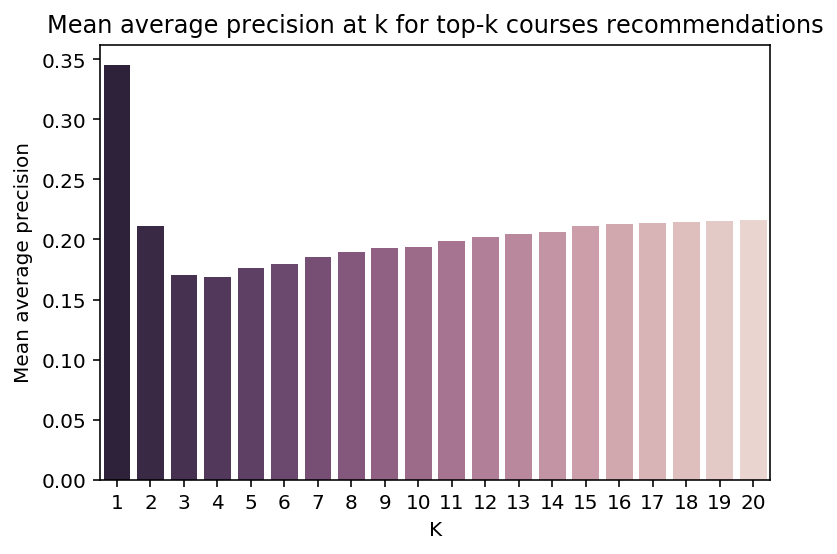

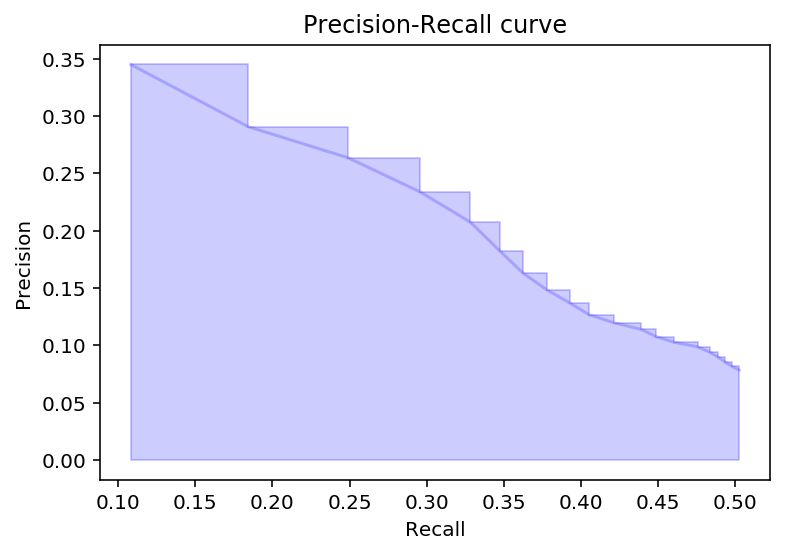

In [15]:
print_stats_prediction(pred)

## Only co-enrolment matrix

For k = 27 :
For q = 0.998 :
	difference of success rates at 10 - 1: 60.3359173126615

	Success Rate at 1: 18.346253
	MAP at 1: 0.1834625322997416
	Precision at 1: 0.1834625322997416
	Recall at 1: 0.06265227021040974
	F1 score at 1: 0.09340636182706107

	Success Rate at 2: 30.878553
	MAP at 2: 0.10465116279069768
	Precision at 2: 0.16731266149870802
	Recall at 2: 0.11004675772117632
	F1 score at 2: 0.1327679151868768

	Success Rate at 3: 42.118863
	MAP at 3: 0.08570198105081825
	Precision at 3: 0.1640826873385013
	Recall at 3: 0.16278146917681802
	F1 score at 3: 0.163429488238732

	Success Rate at 4: 51.162791
	MAP at 4: 0.08570198105081825
	Precision at 4: 0.15503875968992248
	Recall at 4: 0.20324227882367416
	F1 score at 4: 0.17589784240943038

	Success Rate at 5: 58.656331
	MAP at 5: 0.08897502153316107
	Precision at 5: 0.1483204134366925
	Recall at 5: 0.24055924695459577
	F1 score at 5: 0.18350071036589682

	Success Rate at 6: 64.599483
	MAP at 6: 0.09222652885443582
	Precision at 

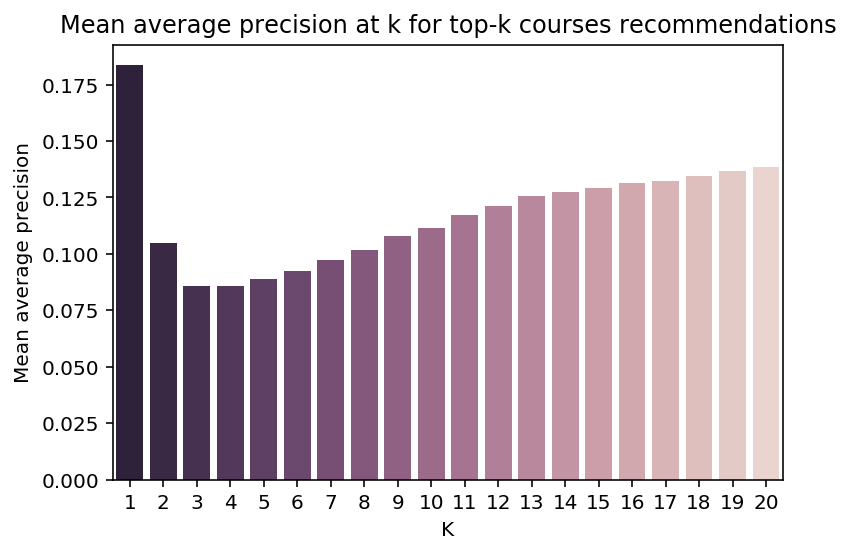

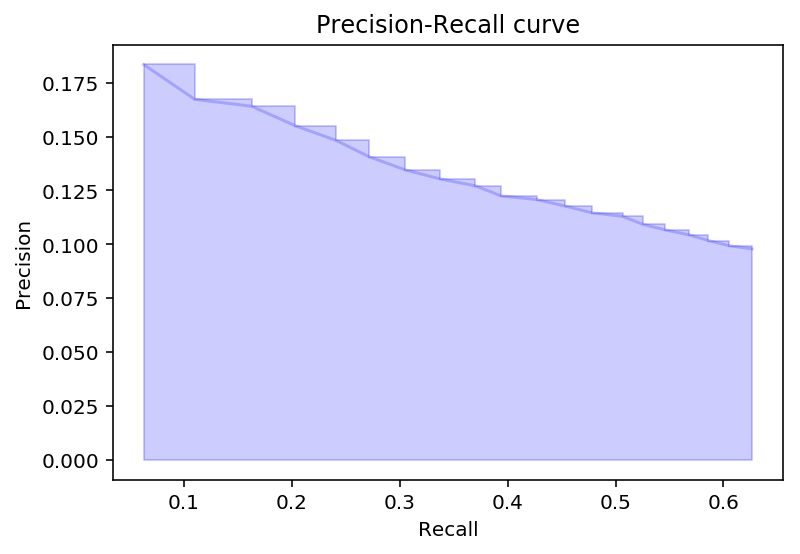

In [16]:
preds = np.array([ np.array(training_weight_coenrolments(i)) for i, nn_weights in enumerate(pred) ])
print_stats_prediction(preds)

## Only grade correlations inbetween courses

For k = 27 :
For q = 0.998 :
	difference of success rates at 10 - 1: 40.56847545219638

	Success Rate at 1: 9.819121
	MAP at 1: 0.09819121447028424
	Precision at 1: 0.09819121447028424
	Recall at 1: 0.031287683031869074
	F1 score at 1: 0.04745446021131648

	Success Rate at 2: 17.183463
	MAP at 2: 0.05297157622739018
	Precision at 2: 0.08979328165374677
	Recall at 2: 0.05798880275624461
	F1 score at 2: 0.07046868934679877

	Success Rate at 3: 21.834625
	MAP at 3: 0.03940568475452196
	Precision at 3: 0.07924203273040482
	Recall at 3: 0.075968992248062
	F1 score at 3: 0.07757100207349284

	Success Rate at 4: 27.648579
	MAP at 4: 0.03692937123169681
	Precision at 4: 0.07622739018087855
	Recall at 4: 0.09748062015503876
	F1 score at 4: 0.08555383546518835

	Success Rate at 5: 32.687339
	MAP at 5: 0.0382213608957795
	Precision at 5: 0.07467700258397933
	Recall at 5: 0.11823858742463393
	F1 score at 5: 0.09153955155455532

	Success Rate at 6: 35.658915
	MAP at 6: 0.04151593453919035
	Precisio

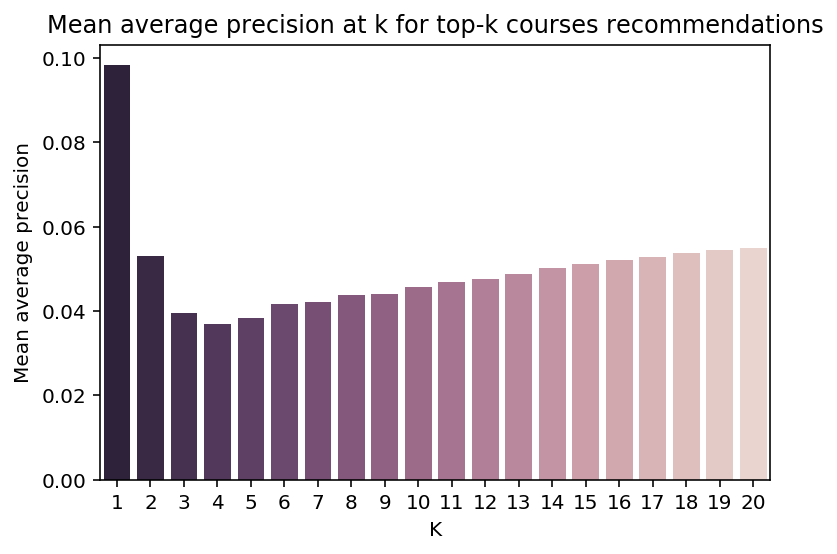

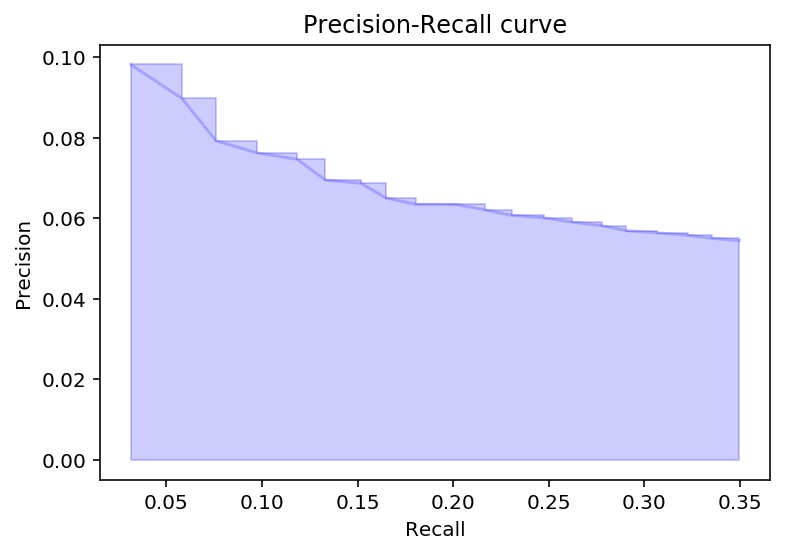

In [17]:
preds = np.array([ np.array(training_weight_grade_corr(i)) for i, nn_weights in enumerate(pred) ])
print_stats_prediction(preds)

## Baseline + co-enrolment matrix

For k = 27 :
For q = 0.998 :
	difference of success rates at 10 - 1: 49.61240310077519

	Success Rate at 1: 40.956072
	MAP at 1: 0.4095607235142119
	Precision at 1: 0.4095607235142119
	Recall at 1: 0.13117078872892826
	F1 score at 1: 0.19870269040874164

	Success Rate at 2: 54.780362
	MAP at 2: 0.2564599483204134
	Precision at 2: 0.32558139534883723
	Recall at 2: 0.2082933431770641
	F1 score at 2: 0.25405374114801865

	Success Rate at 3: 63.178295
	MAP at 3: 0.204349698535745
	Precision at 3: 0.2734711455641688
	Recall at 3: 0.258724006398425
	F1 score at 3: 0.26589325420875554

	Success Rate at 4: 69.767442
	MAP at 4: 0.20553402239448748
	Precision at 4: 0.24967700258397932
	Recall at 4: 0.31462409253106927
	F1 score at 4: 0.27841307076622424

	Success Rate at 5: 76.098191
	MAP at 5: 0.218733850129199
	Precision at 5: 0.23255813953488372
	Recall at 5: 0.365959148517288
	F1 score at 5: 0.28439204822946423

	Success Rate at 6: 80.232558
	MAP at 6: 0.23542204995693364
	Precision at 6: 0.

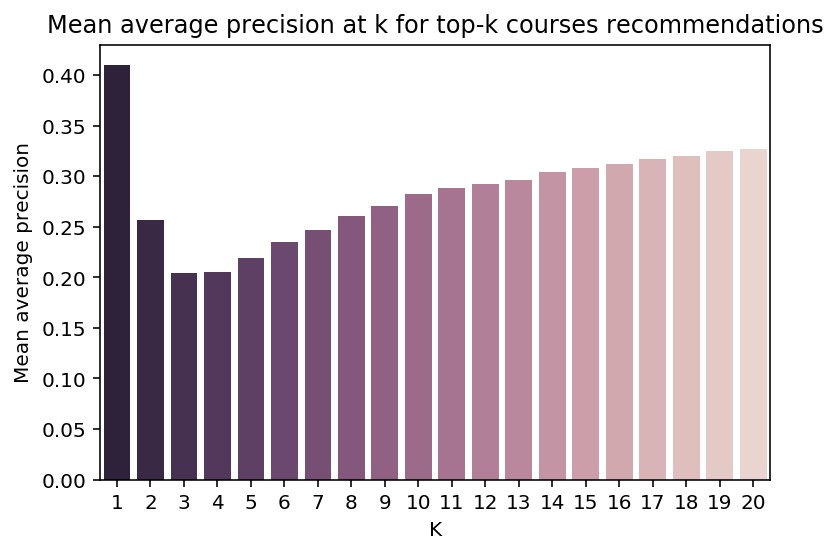

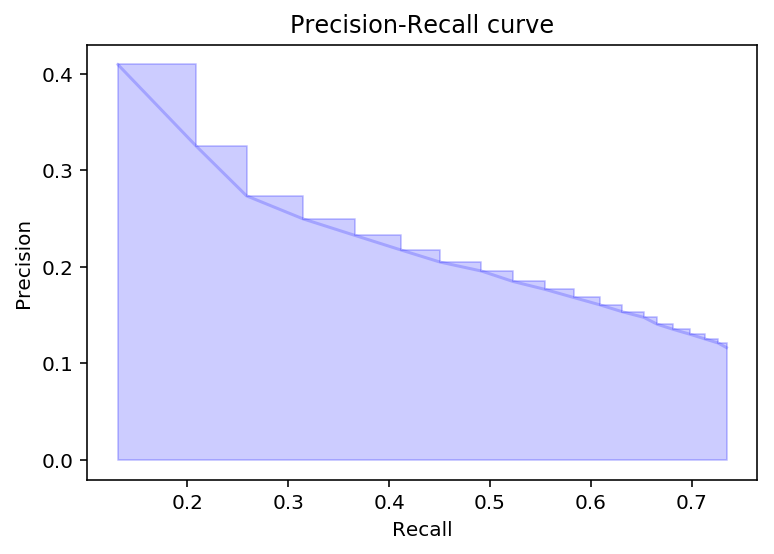

In [18]:
preds = np.array([ np.array(training_weight_coenrolments(i)) * np.array(nn_weights) for i, nn_weights in enumerate(pred) ])
print_stats_prediction(preds)

## Baseline + grade correlations inbetween courses

For k = 27 :
For q = 0.998 :
	difference of success rates at 10 - 1: 48.57881136950904

	Success Rate at 1: 32.558140
	MAP at 1: 0.32558139534883723
	Precision at 1: 0.32558139534883723
	Recall at 1: 0.10375907468930723
	F1 score at 1: 0.1573670626225733

	Success Rate at 2: 50.000000
	MAP at 2: 0.2041343669250646
	Precision at 2: 0.291343669250646
	Recall at 2: 0.1859511504860342
	F1 score at 2: 0.22701143294984238

	Success Rate at 3: 61.757106
	MAP at 3: 0.16300602928509905
	Precision at 3: 0.25925925925925924
	Recall at 3: 0.24541651285837335
	F1 score at 3: 0.2521480397867086

	Success Rate at 4: 67.312661
	MAP at 4: 0.16268303186907837
	Precision at 4: 0.23352713178294573
	Recall at 4: 0.2953088470530331
	F1 score at 4: 0.2608091385696454

	Success Rate at 5: 71.447028
	MAP at 5: 0.16767872523686478
	Precision at 5: 0.20930232558139536
	Recall at 5: 0.33139842500307615
	F1 score at 5: 0.2565650629194725

	Success Rate at 6: 73.126615
	MAP at 6: 0.17112403100775192
	Precision at 6

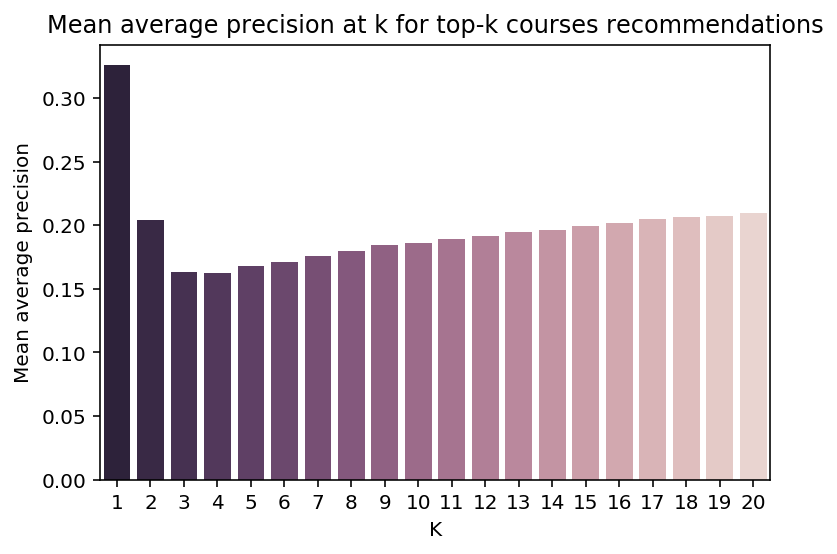

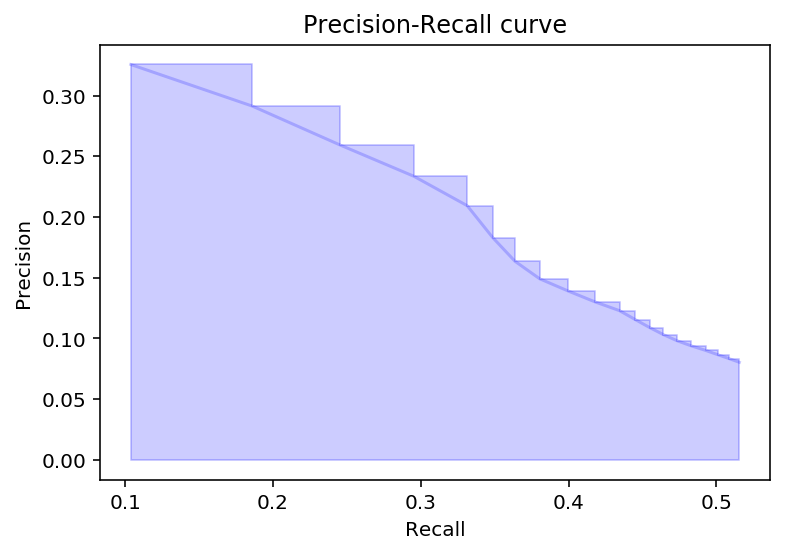

In [19]:
preds = np.array([ np.array(training_weight_grade_corr(i)) * np.array(nn_weights) for i, nn_weights in enumerate(pred) ])
print_stats_prediction(preds)

## Grade correlations inbetween courses + co-enrolments

For k = 27 :
For q = 0.998 :
	difference of success rates at 10 - 1: 59.9483204134367

	Success Rate at 1: 18.346253
	MAP at 1: 0.1834625322997416
	Precision at 1: 0.1834625322997416
	Recall at 1: 0.06194167589516426
	F1 score at 1: 0.09261435896479134

	Success Rate at 2: 31.395349
	MAP at 2: 0.10400516795865633
	Precision at 2: 0.16925064599483206
	Recall at 2: 0.11265227021040972
	F1 score at 2: 0.13526975713876416

	Success Rate at 3: 42.248062
	MAP at 3: 0.08484065460809645
	Precision at 3: 0.1619293712316968
	Recall at 3: 0.1603266888150609
	F1 score at 3: 0.16112404469734928

	Success Rate at 4: 50.258398
	MAP at 4: 0.08527131782945736
	Precision at 4: 0.1524547803617571
	Recall at 4: 0.19934477667035802
	F1 score at 4: 0.17277488578968625

	Success Rate at 5: 58.527132
	MAP at 5: 0.08847975882859602
	Precision at 5: 0.14806201550387596
	Recall at 5: 0.2401285837332349
	F1 score at 5: 0.1831776563240126

	Success Rate at 6: 64.599483
	MAP at 6: 0.09130060292850989
	Precision at 

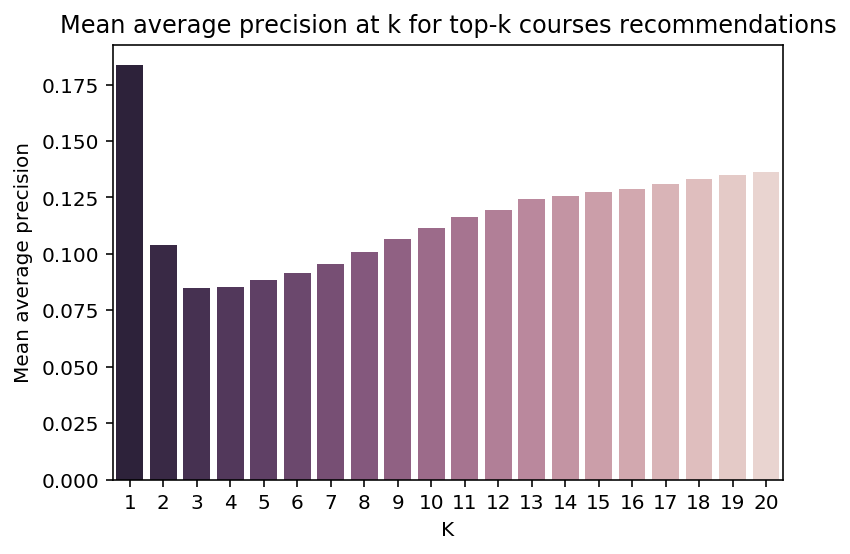

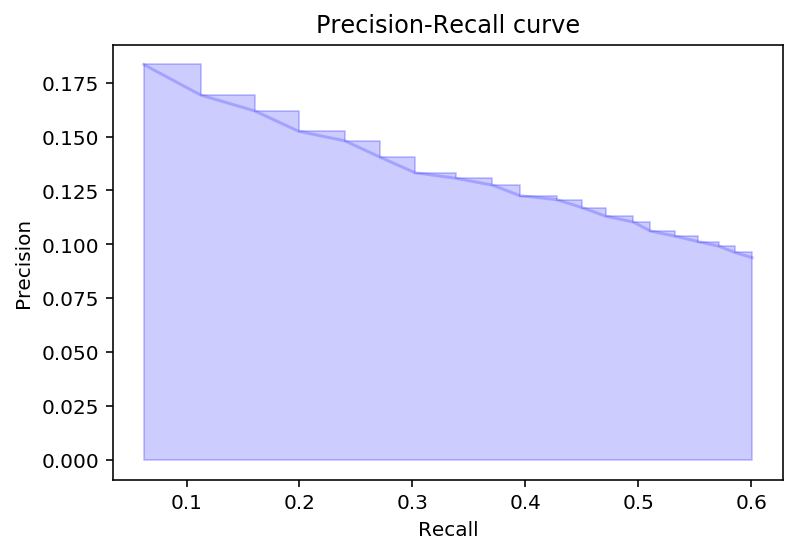

In [20]:
preds = np.array([ np.array(training_weight_coenrolments(i)) * np.array(training_weight_grade_corr(i)) for i, nn_weights in enumerate(pred) ])
print_stats_prediction(preds)

## Baseline + grade correlations inbetween courses + co-enrolments

For k = 27 :
For q = 0.998 :
	difference of success rates at 10 - 1: 48.57881136950905

	Success Rate at 1: 41.214470
	MAP at 1: 0.41214470284237725
	Precision at 1: 0.41214470284237725
	Recall at 1: 0.13192444936630982
	F1 score at 1: 0.1998715154534867

	Success Rate at 2: 54.392765
	MAP at 2: 0.25775193798449614
	Precision at 2: 0.3236434108527132
	Recall at 2: 0.2070013535129814
	F1 score at 2: 0.25250272348263525

	Success Rate at 3: 63.436693
	MAP at 3: 0.2054263565891473
	Precision at 3: 0.2739018087855297
	Recall at 3: 0.2591546696197859
	F1 score at 3: 0.2663242475785203

	Success Rate at 4: 69.638243
	MAP at 4: 0.20607235142118863
	Precision at 4: 0.2487080103359173
	Recall at 4: 0.31356896763873504
	F1 score at 4: 0.27739750016239545

	Success Rate at 5: 76.227390
	MAP at 5: 0.2201550387596899
	Precision at 5: 0.23333333333333336
	Recall at 5: 0.36741417497231443
	F1 score at 5: 0.2854110020431049

	Success Rate at 6: 80.103359
	MAP at 6: 0.2350129198966408
	Precision at 6: 

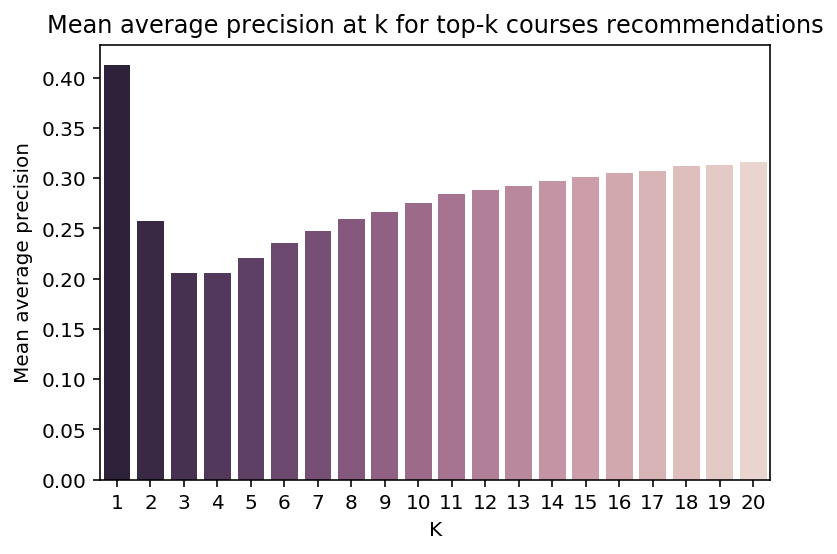

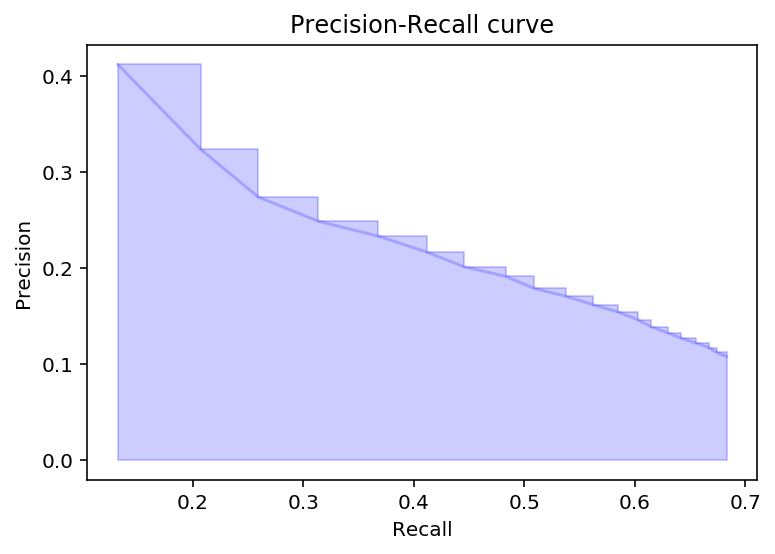

In [21]:
preds = np.array([ np.array(training_weight_coenrolments(i)) * np.array(training_weight_grade_corr(i)) * np.array(nn_weights) for i, nn_weights in enumerate(pred) ])
print_stats_prediction(preds)

### Splitting into group1, group2 courses

In [22]:
group1_courses = ["Advanced algorithms", "Advanced computer architecture",
                 "Cryptography and security", "Advanced databases",
                 "Distributed algorithms", "Distributed information systems",
                 "Foundations of software", "Information theory and coding",
                 "Pattern classification and machine learning"]
MIN_COURSES_BY_STUDENT_group1 = 2
MIN_COURSES_BY_STUDENT_group2 = 3

group1_courses_matrix = courses_matrix[group1_courses]
group1_courses_matrix = group1_courses_matrix[np.sum(group1_courses_matrix == 1, axis=1) > MIN_COURSES_BY_STUDENT_group1]
group2_courses_matrix = courses_matrix.drop(group1_courses, axis=1)
group2_courses_matrix = group2_courses_matrix[np.sum(group2_courses_matrix == 1, axis=1) > MIN_COURSES_BY_STUDENT_group2]

training_set_group1, testing_set_group1 = split_data(group1_courses_matrix)
training_set_group2, testing_set_group2 = split_data(group2_courses_matrix)

# Numpify the data
train_np_1 = training_set_group1.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()
test_np_1 = testing_set_group1.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()
train_np_2 = training_set_group2.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()
test_np_2 = testing_set_group2.apply(axis=1, func=lambda x: x.astype(int)).as_matrix()

# the indices of each user
users_group1 = np.array(np.arange(group1_courses_matrix.shape[0])[np.newaxis].T, dtype=np.int32)
users_group2 = np.array(np.arange(group2_courses_matrix.shape[0])[np.newaxis].T, dtype=np.int32)

### Prediction for a student

In [23]:
me = [ 
"Distributed information systems",
"Information theory and coding",
"Pattern classification and machine learning",
"Mobile networks",
"Statistical signal and data processing through applications",
"TCP/IP networking",
"Digital education & learning analytics"]
my_courses = pd.DataFrame(data=0, columns=courses_matrix.columns, index=["Romain"])
my_courses[me] = 1
taken_courses = my_courses.loc["Romain"][my_courses.loc["Romain"] == 1].index.tolist()

my_binary_courses = my_courses.as_matrix()
binary_courses_format = np.array([[1]], dtype=np.int32)

In [24]:
prediction_romain = model.predict(x=[my_binary_courses, binary_courses_format])
prediction_romain = np.argsort(prediction_romain)

predicted_courses = [courses_matrix.columns[i] for i in prediction_romain[0]]
last_year_courses = list(registrations.xs('2015-2016', level='YearName').index)
predicted_courses = [c for c in predicted_courses if c in last_year_courses and c not in taken_courses]

print("I picked the following courses: \n\t-{} \n\nHence we propose the following: \n\t-{}"
     .format("\n\t-".join(taken_courses), "\n\t-".join(predicted_courses[::-1][:10])))

I picked the following courses: 
	-Digital education & learning analytics
	-Distributed information systems
	-Information theory and coding
	-Mobile networks
	-Pattern classification and machine learning
	-Statistical signal and data processing through applications
	-TCP/IP networking 

Hence we propose the following: 
	-Cryptography and security
	-Distributed algorithms
	-Biometrics
	-Advanced digital communications
	-Concurrent algorithms
	-Management de projet et analyse du risque
	-Foundations of software
	-Automatic speech processing
	-Intelligent agents
	-Program parallelization on PC clusters


### Done
- All data gives really bad results (discrimination by section)
- Results are different from one domain to another (BEFORE WEIGHING OUT THE OBLIGATORY COURSES, or courses that are bloat (laboratories etc..., case by case basis ?)
- [They talk a bit about top-N recommendation in this paper (Boi)](http://delivery.acm.org/10.1145/2810000/2800184/p179-maksai.pdf?ip=128.179.189.64&id=2800184&acc=ACTIVE%20SERVICE&key=FC66C24E42F07228%2E7E17DDD1CCA0F75B%2E4D4702B0C3E38B35%2E4D4702B0C3E38B35&CFID=1003867347&CFTOKEN=59100520&__acm__=1510214008_777b3b2b2f3763bb6c7aa57bcdcdf49a)
- Move to the new data
- Right precision and recall metrics
- Right test/train se
- Try on like 5 sections with same parameters if still good results
- Doing it by faculty gives same results (for IC)
- Split options and obligatory recommendations
- Quick hard-coded demo for taken courses
- Co-enrolment matrix
- Multiply probability of taking course at output with proba that a student takes the predicted course before argsort (mean of coenrolment inbetween one prediction and ALL courses the student took). Then compare baseline with new system.
- Correlation grades used by multiply to each pair of course, and put it in the pipeline. Then compare baseline with this one

### Questions

### To do
- Try by faculty (all courses from ENAC for example, IC is not, and all good)
- Porting code to usable codebase for next coder ?
- Replace names by ids from DB by production code day
- Automatic best parameters detection ? Need a cluster ? Grid Search ?
- start working on demo, boxes for each course and recommend stuff